In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sb

In [3]:
df = pd.read_csv('data/chronic_kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.drop('id', axis=1, inplace=True)
df.sample(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
52,53.0,90.0,1.015,0.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,34,4300,3.7,no,no,no,poor,no,yes,ckd
250,40.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,48,10400,4.5,no,no,no,good,no,no,notckd
310,46.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,102.0,...,44,11000,5.4,no,no,no,good,no,no,notckd
76,48.0,80.0,1.005,4.0,0.0,abnormal,abnormal,notpresent,present,133.0,...,36,\t6200,4,no,yes,no,good,yes,no,ckd
308,43.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,81.0,...,48,6900,4.9,no,no,no,good,no,no,notckd
350,65.0,70.0,1.025,0.0,0.0,NaN,NaN,notpresent,notpresent,85.0,...,43,9600,4.5,no,no,no,good,no,no,notckd
314,39.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,...,41,9400,4.7,no,no,no,good,no,no,notckd
89,50.0,70.0,1.020,0.0,0.0,NaN,normal,notpresent,notpresent,109.0,...,NaN,NaN,NaN,no,no,no,poor,no,no,ckd
210,59.0,100.0,1.015,4.0,2.0,normal,normal,notpresent,notpresent,255.0,...,20,9800,3.9,yes,yes,yes,good,no,yes,ckd
137,45.0,60.0,1.010,2.0,0.0,normal,abnormal,present,notpresent,268.0,...,29,9200,NaN,yes,yes,no,good,no,no,ckd


In [5]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [7]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [8]:
df.sample(5)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
62,15.0,60.0,1.020,3.0,0.0,NaN,normal,notpresent,notpresent,86.0,...,33.0,7700.0,3.8,yes,yes,no,good,no,no,ckd
244,64.0,90.0,1.015,3.0,2.0,NaN,abnormal,present,notpresent,463.0,...,40.0,9800.0,4.6,yes,yes,no,good,no,yes,ckd
362,33.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,89.0,...,40.0,10300.0,4.8,no,no,no,good,no,no,notckd
224,34.0,60.0,1.020,0.0,0.0,NaN,normal,notpresent,notpresent,117.0,...,NaN,NaN,NaN,no,no,no,good,yes,no,ckd
32,61.0,90.0,1.010,1.0,1.0,NaN,normal,notpresent,notpresent,159.0,...,34.0,9600.0,4.0,yes,yes,no,poor,no,no,ckd


In [9]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [10]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [11]:
for col in cat_cols:
    print(f'{col} {df[col].unique()}')

red_blood_cells [nan 'normal' 'abnormal']
pus_cell ['normal' 'abnormal' nan]
pus_cell_clumps ['notpresent' 'present' nan]
bacteria ['notpresent' 'present' nan]
hypertension ['yes' 'no' nan]
diabetes_mellitus ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease ['no' 'yes' '\tno' nan]
appetite ['good' 'poor' nan]
peda_edema ['no' 'yes' nan]
aanemia ['no' 'yes' nan]
class ['ckd' 'ckd\t' 'notckd']


In [12]:
df['diabetes_mellitus'].replace({'\tno':'no', '\tyes':'yes', ' yes':'yes'}, inplace=True)
df['coronary_artery_disease'] = df['coronary_artery_disease'].str.replace('\tno', 'no')
df['class'].replace({'ckd\t': 'ckd', 'notckd': 'not ckd'}, inplace=True)
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [13]:
cols = ['diabetes_mellitus','coronary_artery_disease','class']

for col in cols:
    print(f'{col} {df[col].unique()}')

diabetes_mellitus ['yes' 'no' nan]
coronary_artery_disease ['no' 'yes' nan]
class [0 1]


In [14]:
value_counts = df['class'].value_counts()
categories = value_counts.index
categories = categories.map({0: 'ckd', 1: 'not ckd'})
counts = value_counts.values 

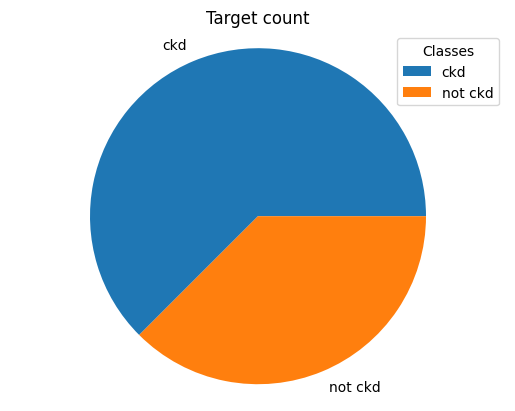

In [15]:
plt.pie(counts, labels=categories)
plt.axis('equal')
plt.title('Target count')
plt.legend(categories, title='Classes', loc='best')
plt.show()

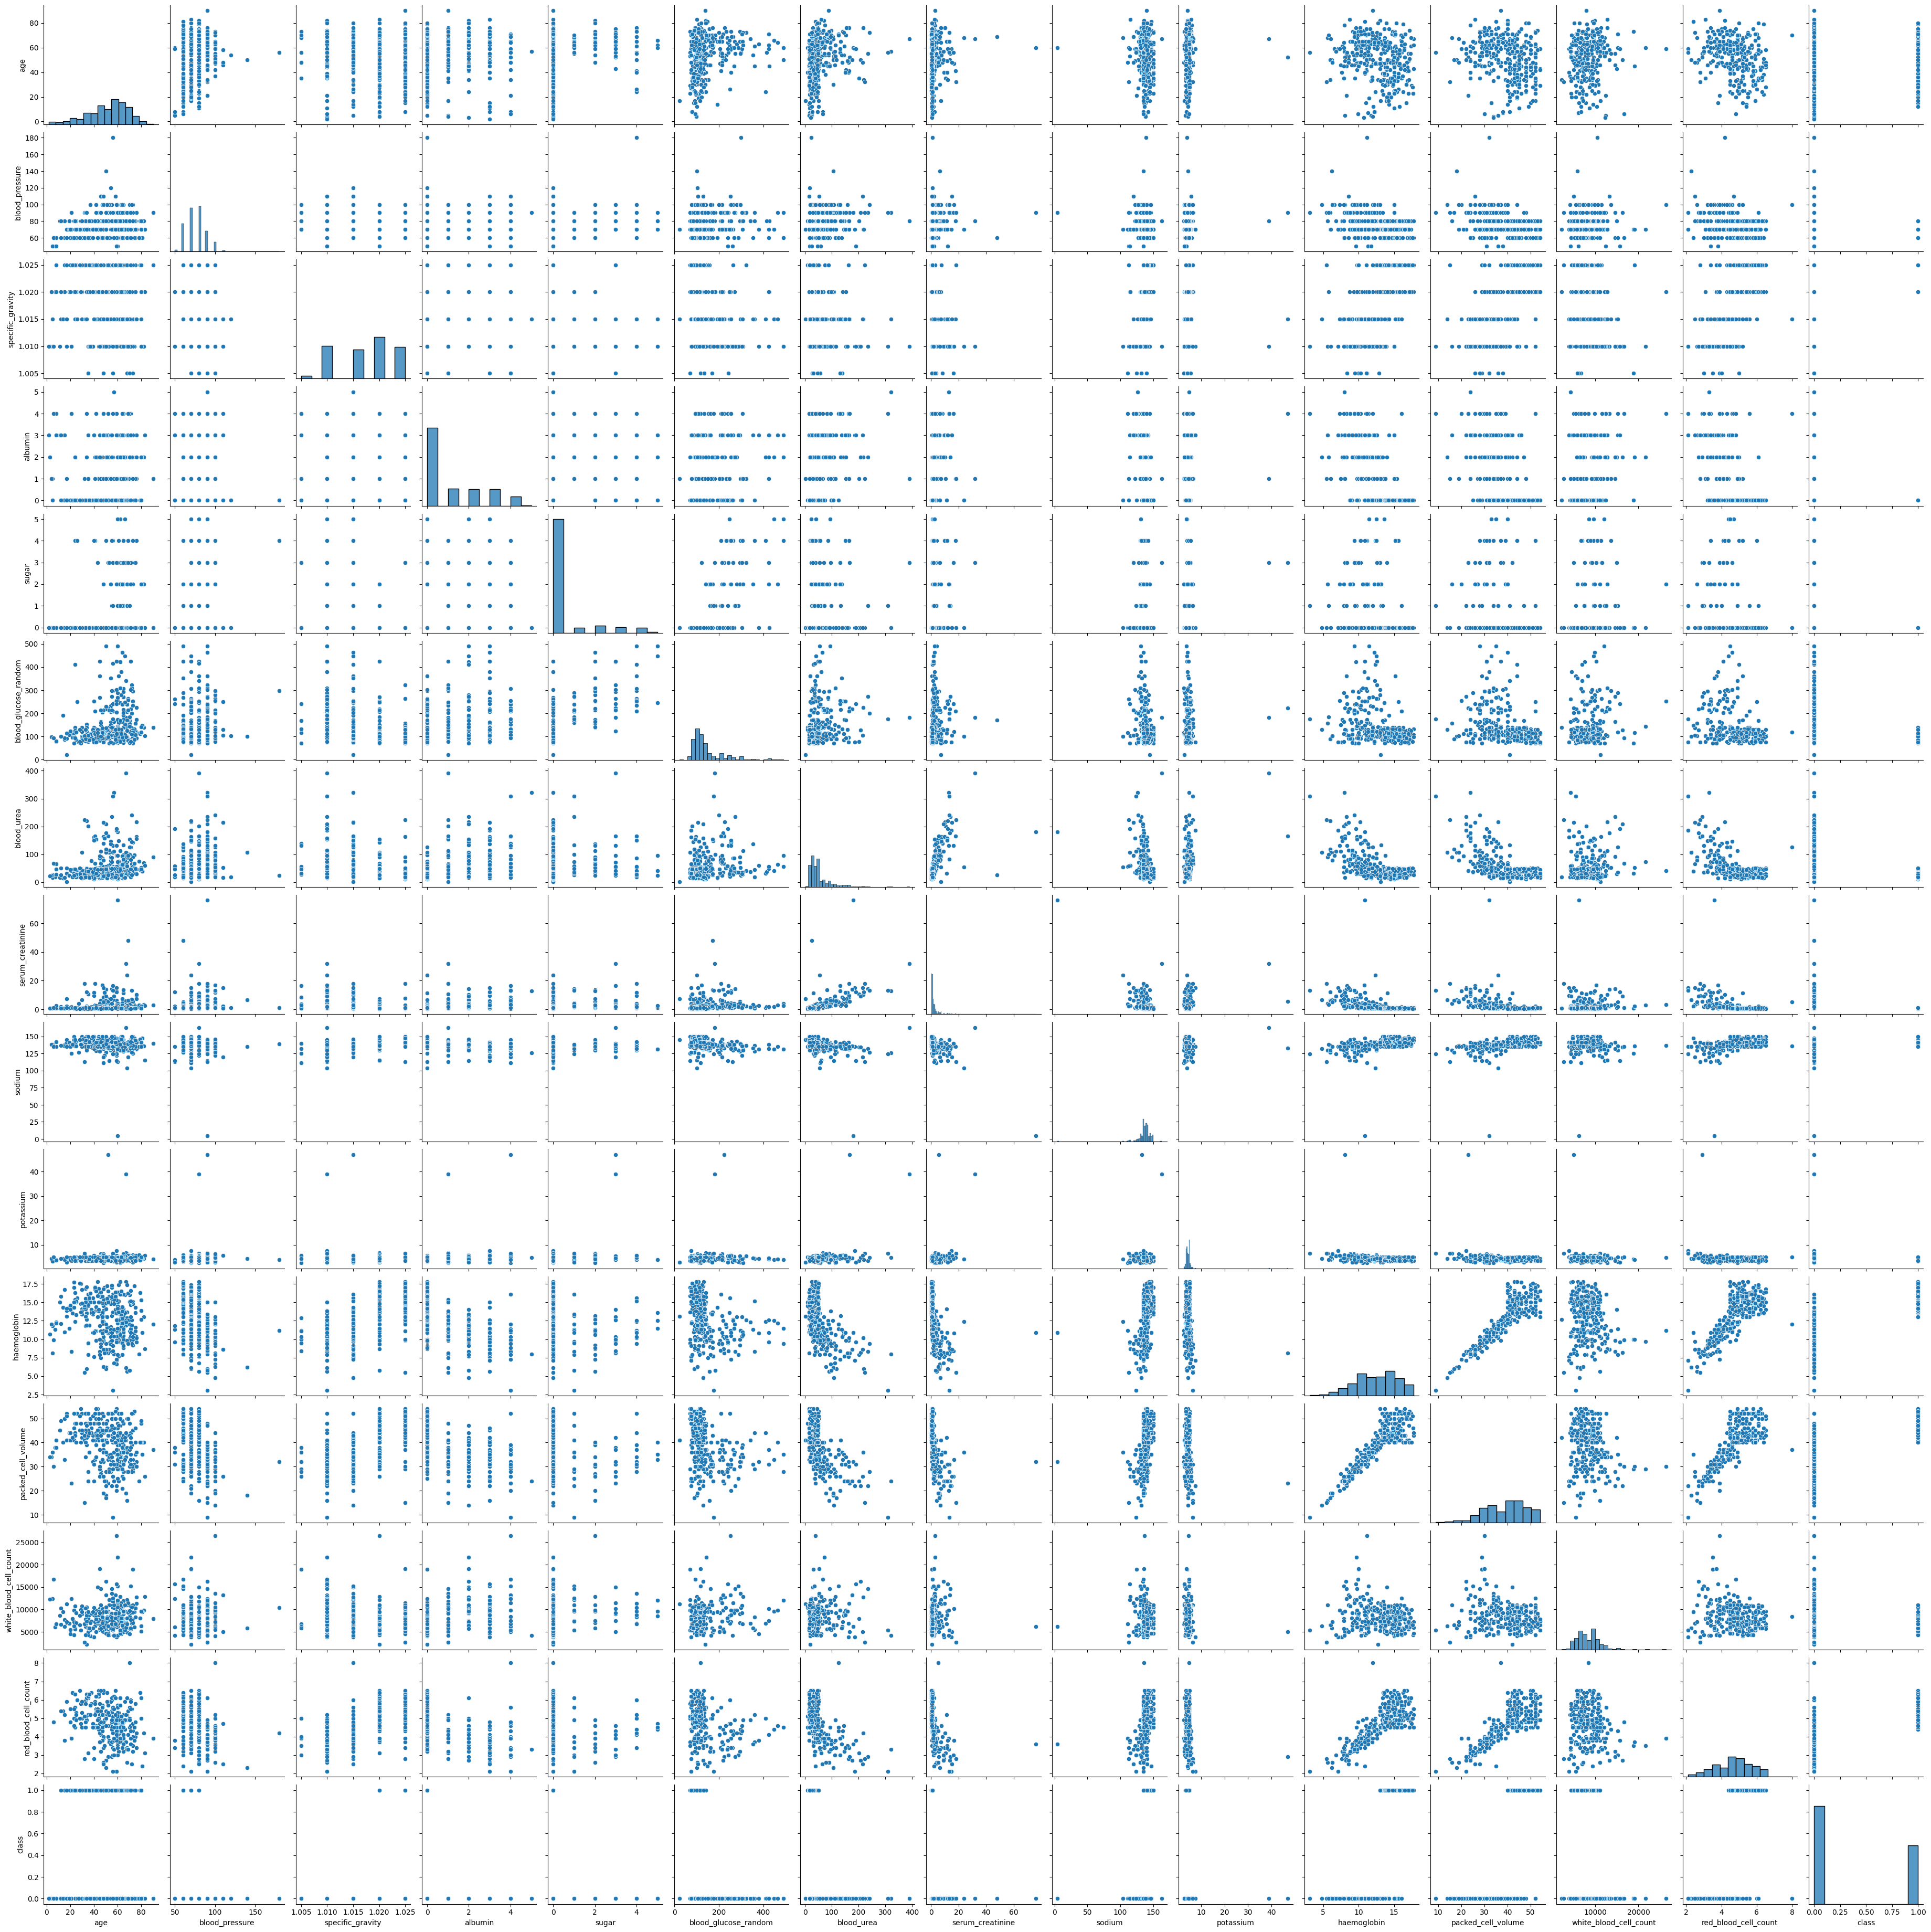

In [16]:
sb.pairplot(df)

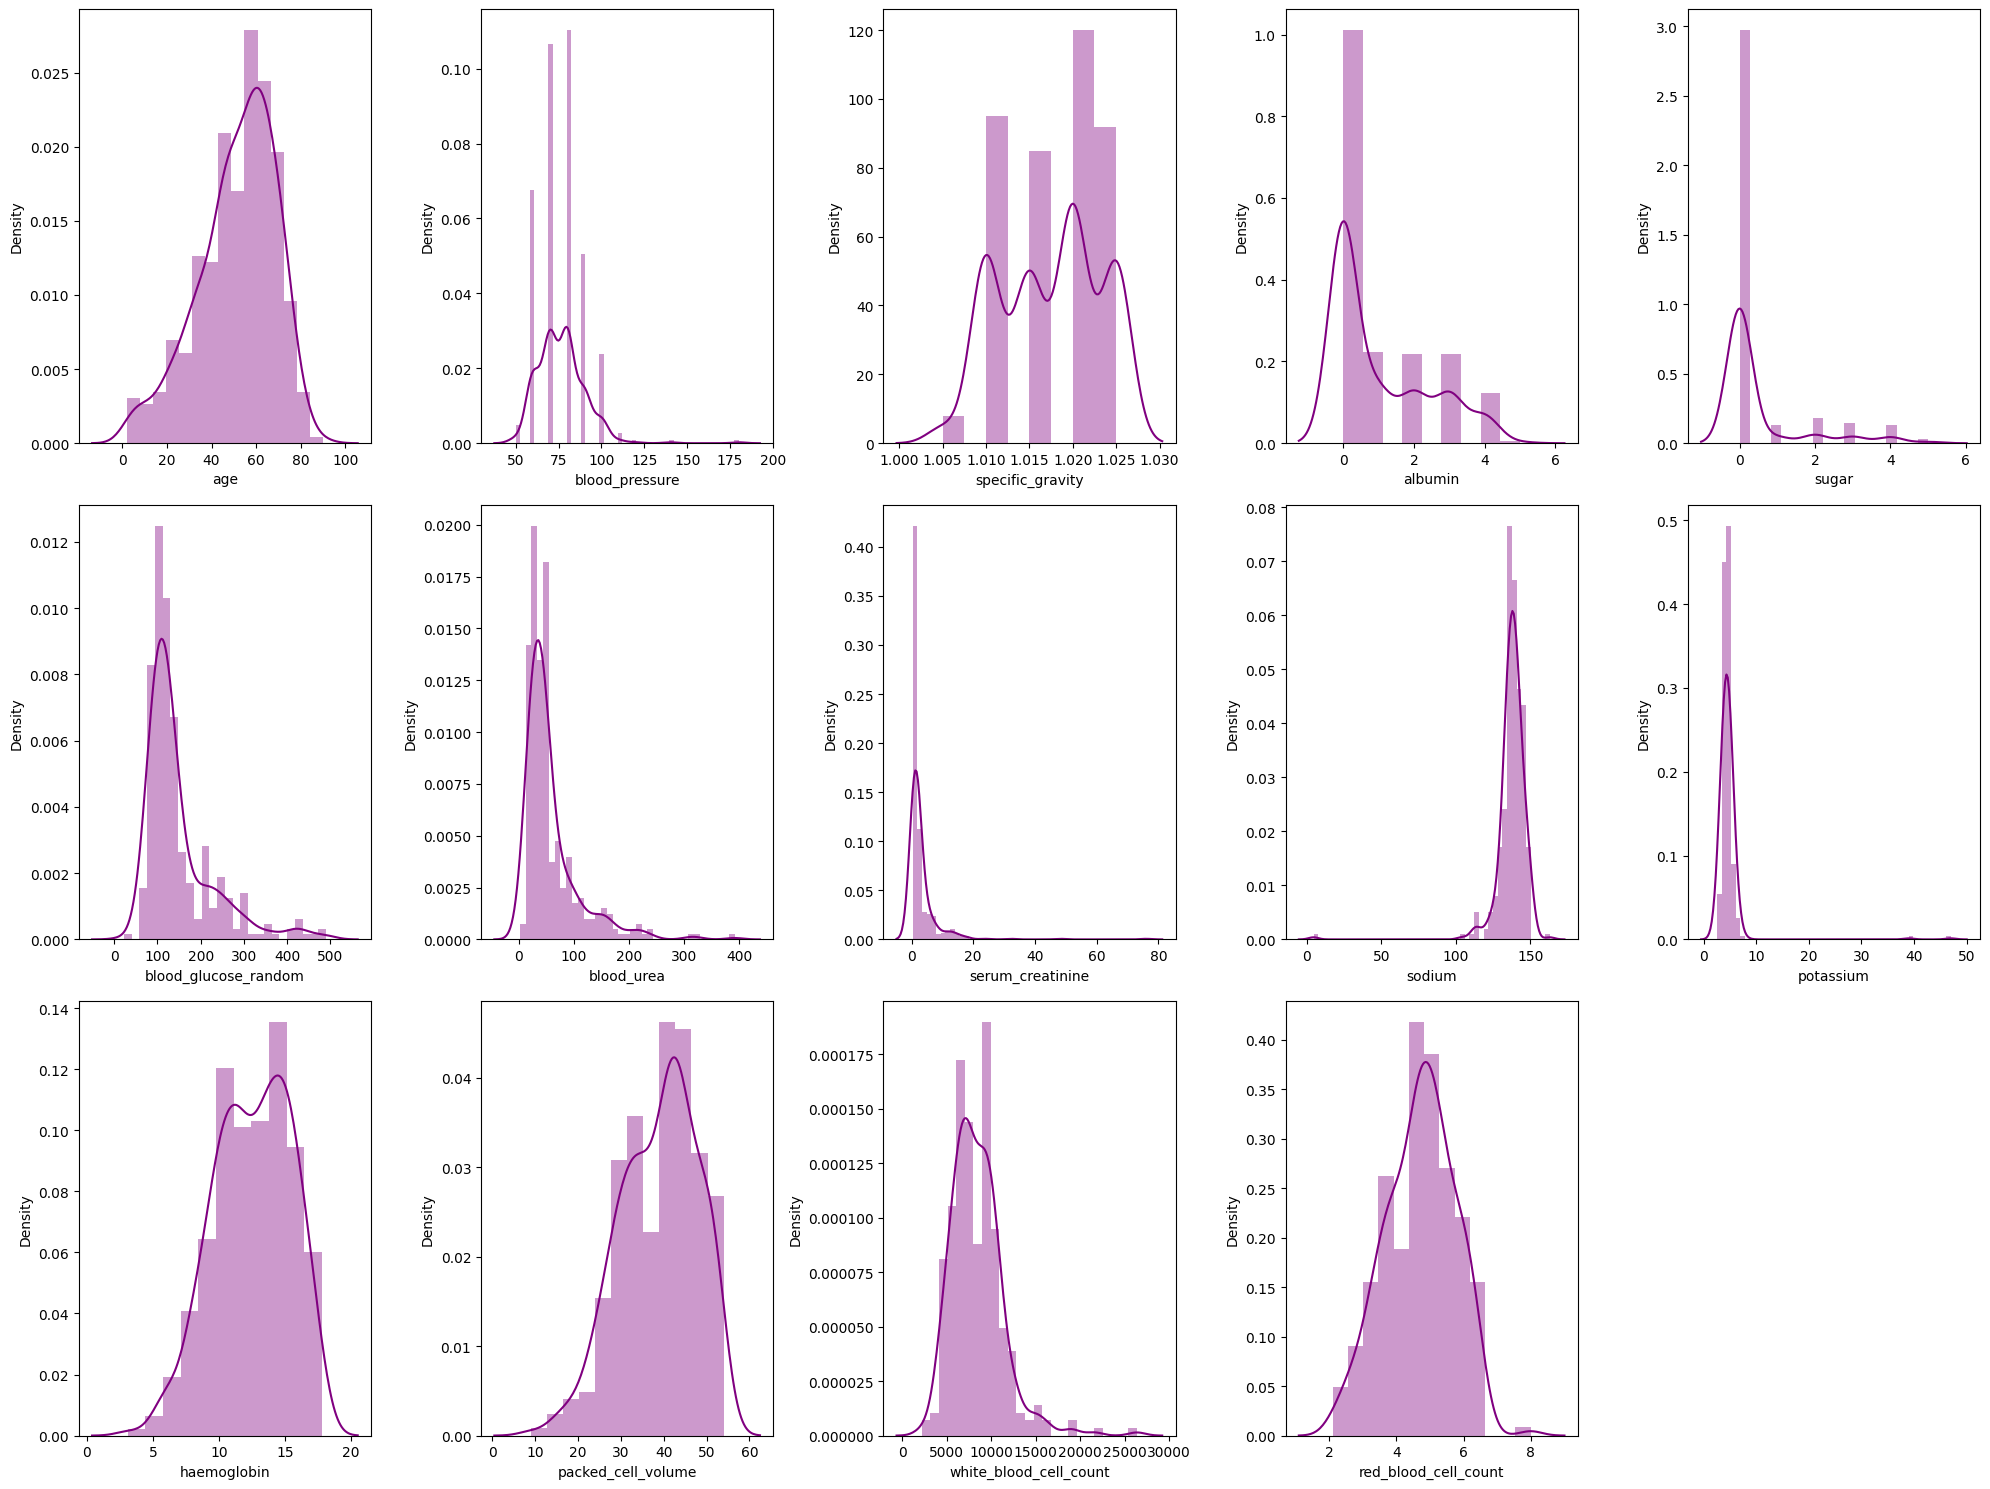

In [17]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 5, i)
    sb.distplot(df[column], color='purple')
    plt.xlabel(column)

plt.tight_layout()
plt.show()



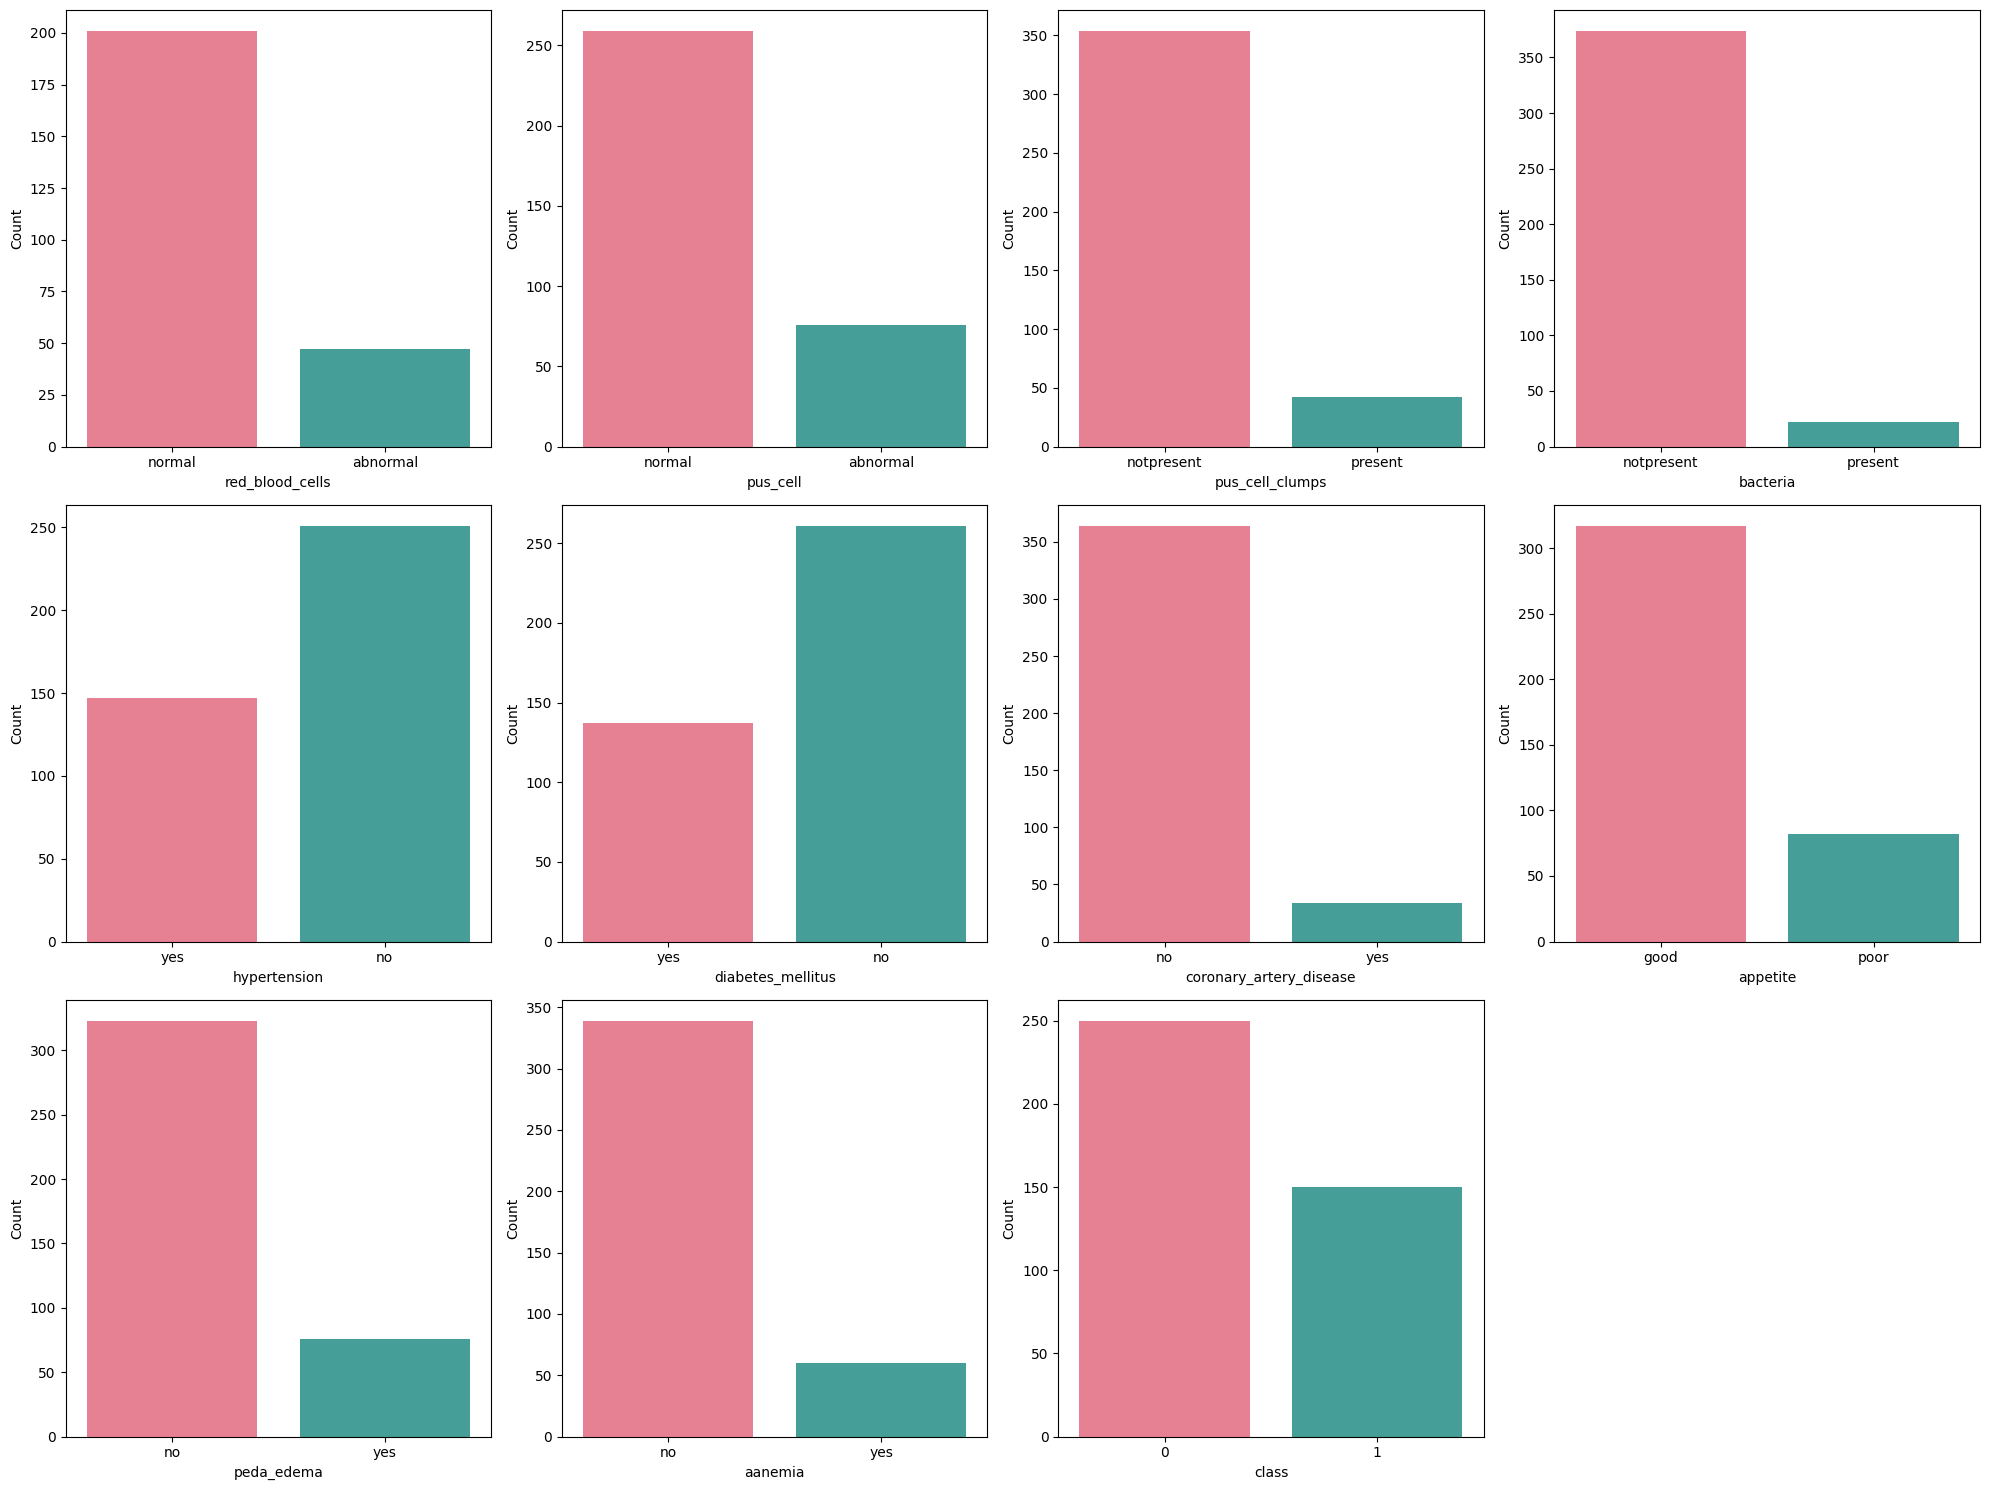

In [18]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(cat_cols, 1):
    plt.subplot(3, 4, i)
    sb.countplot(data=df, x=column, palette='husl')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [22]:
sb.set_theme(style="whitegrid", palette=["purple", "indigo"])
cat_cols_except_class = cat_cols.copy()
cat_cols_except_class.remove('class')
plt.figure(figsize=(20, 15))
for i, column in enumerate(cat_cols_except_class, 1):
    plt.subplot(3, 4, i)
    sb.swarmplot(data=df, x="class", y=column, hue='class')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

ValueError: list.remove(x): x not in list

In [21]:
sb.set_theme(style="whitegrid", palette=["magenta", "teal"])

plt.figure(figsize=(20, 15))
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 5, i)
    sb.swarmplot(data=df, x="class", y=column, hue='class')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

ValueError: Could not generate a palette for <map object at 0x0000013057FAC520>